<a href="https://colab.research.google.com/github/bitcoinmuonnam/Du-doan-BTC/blob/main/ph%C3%A2n%20l%C3%B4%20b%C3%A1n%20n%E1%BB%81n%20c%C3%B4ng%20ngh%E1%BB%87%20l%C3%B5i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor


In [ ]:
data = pd.read_csv("/content/gdrive/MyDrive/dataset.csv")
data.head(5)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1388509200,736.80,736.80,736.80,736.80,5.193497,3826.568781,736.800000
1,1388509260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1388509320,736.80,736.80,734.27,734.27,0.213298,156.905882,735.619504
3,1388509380,734.27,736.01,734.27,736.01,0.086372,63.525489,735.490900
4,1388509440,736.01,736.80,736.01,736.01,0.547323,403.223305,736.718959


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3804189 entries, 0 to 3804188
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 232.2 MB


In [ ]:
df = data

In [ ]:
# Convert Unix time to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

# Resample to daily frequency
df_daily = df.resample('D', on='Timestamp').mean()

# remove Null values
df_daily['Open'].ffill(inplace=True)
df_daily['High'].ffill(inplace=True)
df_daily['Low'].ffill(inplace=True)
df_daily['Close'].ffill(inplace=True)

In [ ]:
df_daily.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2013-12-31,731.590324,732.007824,731.261706,731.580471,6.006122,4386.213316,731.606177
2014-01-01,745.240120,745.627378,744.901939,745.291071,7.301605,5443.011603,745.302284
2014-01-02,757.703870,758.385026,757.016600,757.609814,11.285734,8674.992347,757.829339
2014-01-03,796.741738,797.348291,796.137979,796.777571,11.040314,8816.413625,796.724760
2014-01-04,811.267723,811.788069,810.725038,811.277892,8.453956,6882.089088,811.281011


In [ ]:
historical_df = df_daily
historical_df = historical_df.drop(["Volume_(BTC)","Volume_(Currency)","Weighted_Price"],axis = 1)


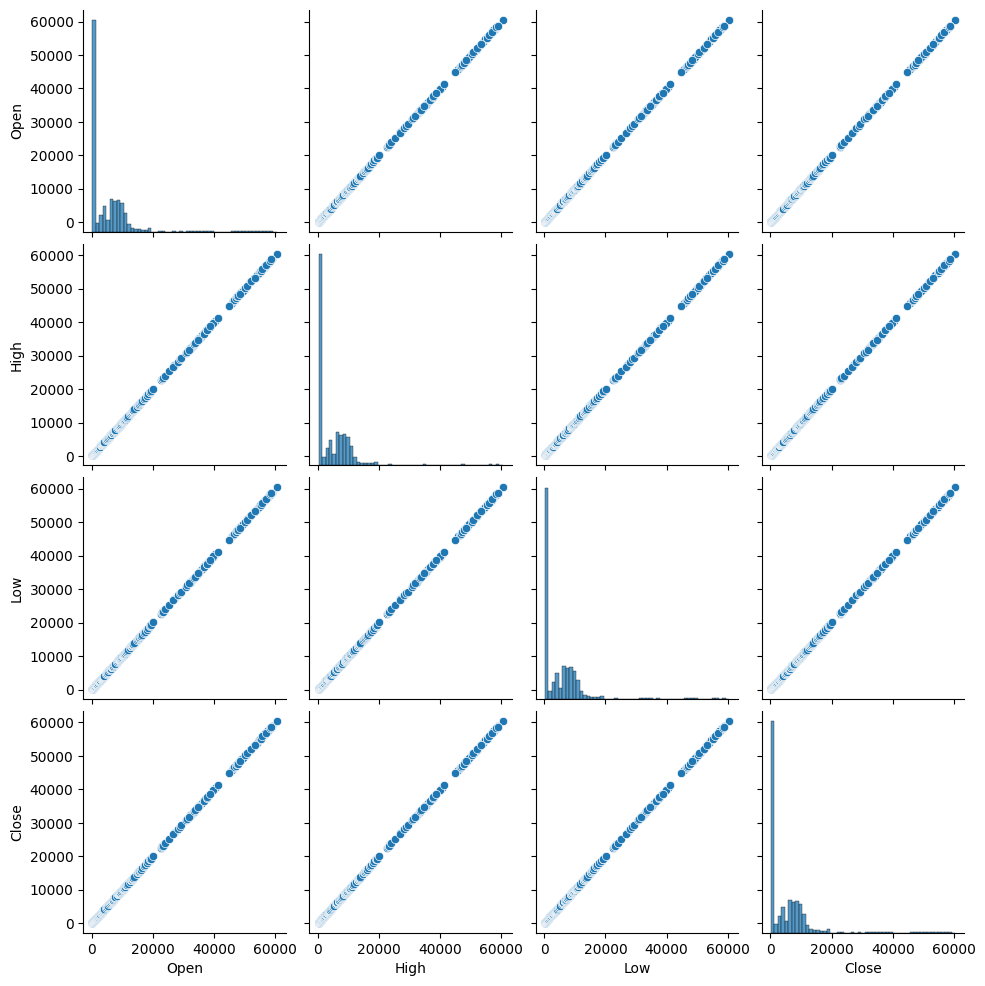

In [ ]:
sb.pairplot(historical_df)

In [ ]:
for i in range(1,8):
    historical_df["Open_past_"+str(i)] = df_daily['Open'].shift(i)
    historical_df["High_past_"+str(i)] = df_daily['High'].shift(i)
    historical_df["Low_past_"+str(i)]  = df_daily['Low'].shift(i)
    historical_df["Close_past_"+str(i)]= df_daily['Close'].shift(i)
historical_df = historical_df.dropna()
print(historical_df.shape)
historical_df.head(7)

(2641, 32)


,Open,High,Low,Close,Open_past_1,High_past_1,Low_past_1,Close_past_1,Open_past_2,High_past_2,...,Low_past_5,Close_past_5,Open_past_6,High_past_6,Low_past_6,Close_past_6,Open_past_7,High_past_7,Low_past_7,Close_past_7
Timestamp,,,,,,,,,,,,,,,,,,,,,
2014-01-07,885.793173,887.338173,884.163823,885.640329,938.238864,939.622498,936.875983,938.203236,867.755211,868.685150,...,757.016600,757.609814,745.240120,745.627378,744.901939,745.291071,731.590324,732.007824,731.261706,731.580471
2014-01-08,814.840503,816.162075,813.379186,814.824858,885.793173,887.338173,884.163823,885.640329,938.238864,939.622498,...,796.137979,796.777571,757.703870,758.385026,757.016600,757.609814,745.240120,745.627378,744.901939,745.291071
2014-01-09,821.572651,822.482232,820.575947,821.589743,814.840503,816.162075,813.379186,814.824858,885.793173,887.338173,...,810.725038,811.277892,796.741738,797.348291,796.137979,796.777571,757.703870,758.385026,757.016600,757.609814
2014-01-10,824.583883,825.211190,823.917513,824.611068,821.572651,822.482232,820.575947,821.589743,814.840503,816.162075,...,866.893128,867.778835,811.267723,811.788069,810.725038,811.277892,796.741738,797.348291,796.137979,796.777571
2014-01-11,878.623881,879.366127,877.955193,878.692114,824.583883,825.211190,823.917513,824.611068,821.572651,822.482232,...,936.875983,938.203236,867.755211,868.685150,866.893128,867.778835,811.267723,811.788069,810.725038,811.277892
2014-01-12,863.727640,864.570391,862.811770,863.685486,878.623881,879.366127,877.955193,878.692114,824.583883,825.211190,...,884.163823,885.640329,938.238864,939.622498,936.875983,938.203236,867.755211,868.685150,866.893128,867.778835
2014-01-13,818.159784,819.000974,817.230572,818.174944,863.727640,864.570391,862.811770,863.685486,878.623881,879.366127,...,813.379186,814.824858,885.793173,887.338173,884.163823,885.640329,938.238864,939.622498,936.875983,938.203236


In [ ]:
historical_df["NEXT_CLOSE"] = historical_df['Close'].shift(-1)
historical_df = historical_df.dropna()
print(historical_df.shape)
historical_df.tail(7)

(2640, 33)


<ipython-input-11-ca152e4f797c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historical_df["NEXT_CLOSE"] = historical_df['Close'].shift(-1)


,Open,High,Low,Close,Open_past_1,High_past_1,Low_past_1,Close_past_1,Open_past_2,High_past_2,...,Close_past_5,Open_past_6,High_past_6,Low_past_6,Close_past_6,Open_past_7,High_past_7,Low_past_7,Close_past_7,NEXT_CLOSE
Timestamp,,,,,,,,,,,,,,,,,,,,,
2021-03-24,55126.661216,55169.567708,55082.660874,55126.809462,54704.396340,54741.990215,54667.339653,54706.291854,56789.786370,56827.052114,...,58286.613419,58475.268060,58510.994437,58437.070243,58475.458908,56158.369972,56200.821571,56118.754649,56161.324448,52125.759256
2021-03-25,52124.388145,52170.909958,52077.729319,52125.759256,55126.661216,55169.567708,55082.660874,55126.809462,54704.396340,54741.990215,...,58783.868243,58285.357964,58319.947540,58251.743961,58286.613419,58475.268060,58510.994437,58437.070243,58475.458908,53243.124454
2021-03-26,53240.386393,53273.505247,53210.861161,53243.124454,52124.388145,52170.909958,52077.729319,52125.759256,55126.661216,55169.567708,...,57316.312566,58781.201227,58808.661534,58754.743710,58783.868243,58285.357964,58319.947540,58251.743961,58286.613419,55195.415367
2021-03-27,55193.240643,55219.665031,55168.757372,55195.415367,53240.386393,53273.505247,53210.861161,53243.124454,52124.388145,52170.909958,...,56789.432469,57313.979179,57344.086050,57284.989659,57316.312566,58781.201227,58808.661534,58754.743710,58783.868243,55835.012863
2021-03-28,55833.608471,55857.735342,55810.425126,55835.012863,55193.240643,55219.665031,55168.757372,55195.415367,53240.386393,53273.505247,...,54706.291854,56789.786370,56827.052114,56751.404145,56789.432469,57313.979179,57344.086050,57284.989659,57316.312566,56915.629993
2021-03-29,56914.886595,56946.213593,56885.242967,56915.629993,55833.608471,55857.735342,55810.425126,55835.012863,55193.240643,55219.665031,...,55126.809462,54704.396340,54741.990215,54667.339653,54706.291854,56789.786370,56827.052114,56751.404145,56789.432469,58349.357087
2021-03-30,58347.805624,58371.955310,58323.956690,58349.357087,56914.886595,56946.213593,56885.242967,56915.629993,55833.608471,55857.735342,...,52125.759256,55126.661216,55169.567708,55082.660874,55126.809462,54704.396340,54741.990215,54667.339653,54706.291854,58778.180000


In [ ]:
X_train = historical_df.iloc[0:len(historical_df)*7//10,0:32].values
X_test = historical_df.iloc[len(historical_df)*7//10:,0:32].values
y_train = historical_df.iloc[0:len(historical_df)*7//10,32].values
y_test = historical_df.iloc[len(historical_df)*7//10:,32].values

In [ ]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 10)
rf.fit(X_train, y_train);
test_result = rf.predict(X_test)
RMSD = np.sqrt(np.mean(np.square(test_result.reshape(-1,1) - y_test.reshape(-1,1) )))
print("Root-mean-square error: ", RMSD)

Root-mean-square error:  9880.030393811232


In [ ]:
Timestamp_collector_df = historical_df[len(historical_df) - len(y_test):]
df_Result = pd.DataFrame(y_test, index = Timestamp_collector_df.index, columns=["NEXT_CLOSE"])
df_Result['Predicted'] = test_result
print(df_Result.shape)
df_Result.tail(15)

(792, 2)


,NEXT_CLOSE,Predicted
Timestamp,,
2021-03-16,56161.324448,17522.573651
2021-03-17,58475.458908,17522.573651
2021-03-18,58286.613419,17522.573651
2021-03-19,58783.868243,17522.573651
2021-03-20,57316.312566,17522.573651
2021-03-21,56789.432469,17522.573651
2021-03-22,54706.291854,17522.573651
2021-03-23,55126.809462,17522.573651
2021-03-24,52125.759256,17522.573651


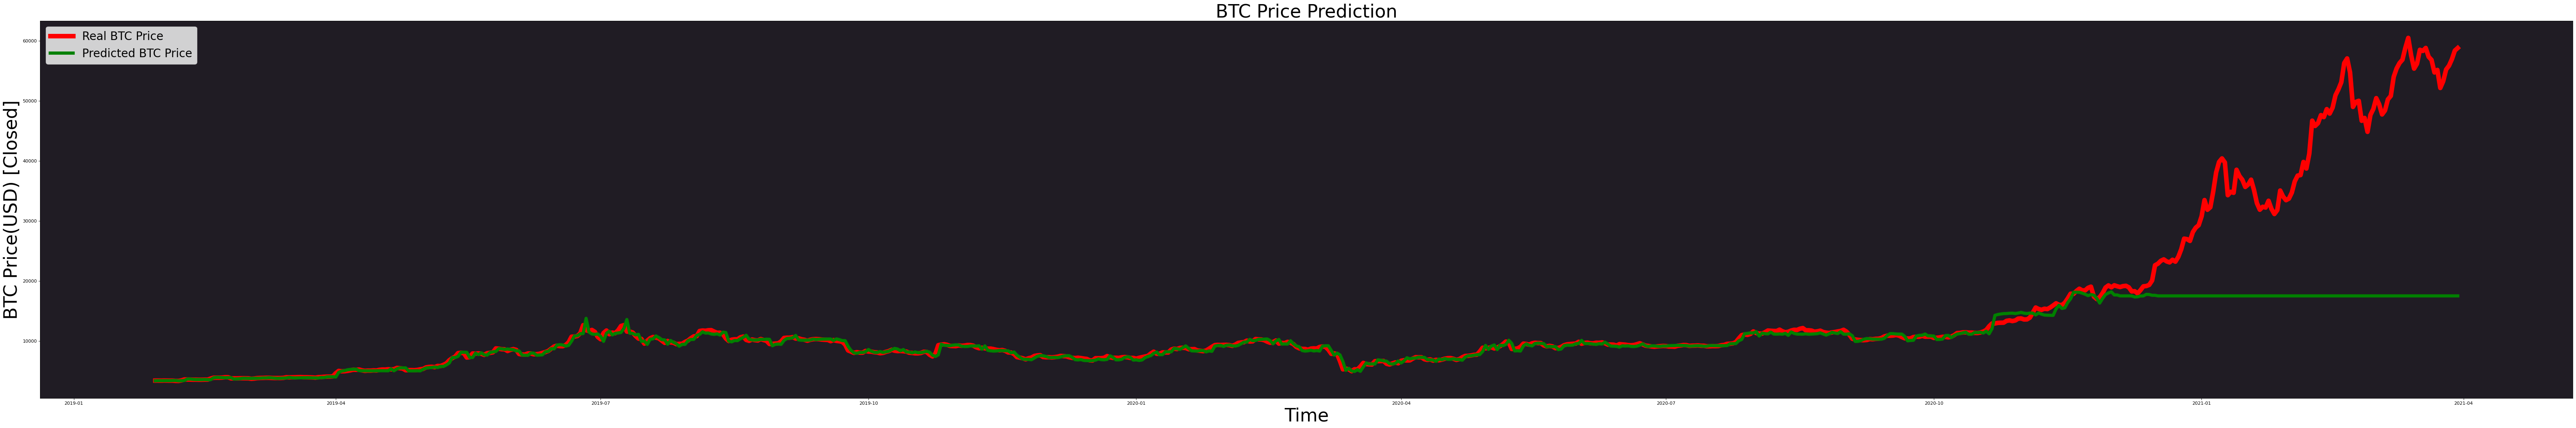

In [ ]:
plt.figure(figsize=(100,15), dpi=80, facecolor='w', edgecolor='w')
ax = plt.gca()
ax.set_facecolor("#201c24")
plt.plot(df_Result['NEXT_CLOSE'], color = 'red', label = 'Real BTC Price', linewidth = 10.0)
plt.plot(df_Result['Predicted'], color = 'green', label = 'Predicted BTC Price', linewidth = 7.0)
plt.title('BTC Price Prediction', fontsize=40)
df_test = df_Result.reset_index()
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD) [Closed]', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()